In [1]:
import pandas as pd
from pandas import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

import warnings
warnings.filterwarnings("ignore")

/var/folders/xy/5y7_zvfj7gb6vpn2j769dmdh0000gn/T/ipykernel_5967/3212456021.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Ice Cream Production Data
In the following task we try to forecast ice cream production data with an AR Model.

In [2]:
# read and inspect data
df = pd.read_csv('ice_cream.csv')
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [3]:
# let's rename the columns
df.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
# convert date column to datetime type
df['date'] = pd.to_datetime(df.date)

# set date as index
df.set_index('date', inplace=True)

Now it's your turn. Follow the instructions in the comments to prepare your Dataframe.

In [7]:
# just get data from 2010 onwards
# hint: now as your index is a datetime type, you can use a datetime variable to access the index



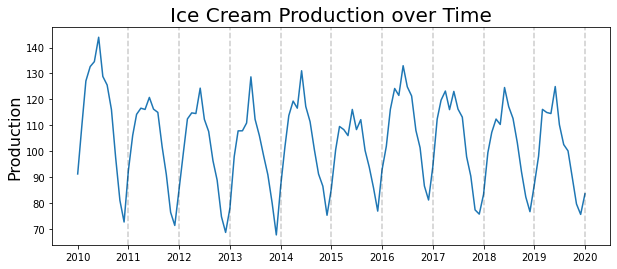

In [9]:
# plot the ice cream data


# Autocorrelation Function (ACF)
Now we will inspect our data with the autocorrelation function.

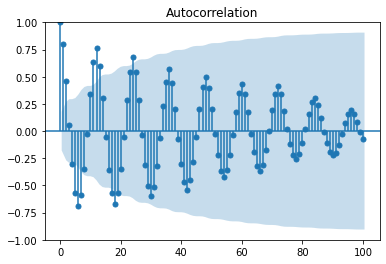

In [10]:
# use the acf plot to inspect your data, use 100 lags
# hint: see plot_acf()


> Conclusion: <br> Based on decaying ACF, we are likely dealing with an Auto Regressive process.

# Partial Autocorrelation Function (PACF)
Let's inspect our data with the PACF to control for other lags so that we can decide which lags to use in our AR Model.

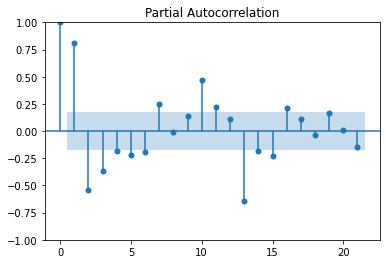

In [11]:
# plot the pacf
# hint: see plot_pacf()


> Conclusion: <br> Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13.

# Autoregressive Model
To build and evaluate our AR Model we need to devide the data in a training and testing set. 

In [12]:
# set dates of training and testing set
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

# now create your sets with the given dates



In [16]:
# to fit the AR Model we use ARIMA without differences and moving average
# research ARIMA from statsmodels
# use the order (p,d,q)
# fit the model with the first 3 lags



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Fri, 14 Oct 2022   AIC                            758.170
Time:                        14:27:27   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.765      -0.396       0.291
ar.L3         -0.4044      0.123     -3.290      0.001      -0.645      -0.164
sigma2        58.4026      9.475      6.164      0.000      39.831      76.974
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                 8.71
Prob(Q):                              0.43   Prob(JB):                         0.01
Heteroskedasticity (H):               0.76   Skew:                             0.70
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
from statsmodels.tsa.ar_model import AutoReg

# now let's use AutoReg from statsmodels and exclude lag 2
# hint: we need to give AutoReg a list of lags


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:              Restr. AutoReg(3)   Log Likelihood                -361.928
Method:               Conditional MLE   S.D. of innovations              7.599
Date:                Fri, 14 Oct 2022   AIC                            731.856
Time:                        14:27:28   BIC                            742.472
Sample:                    04-01-2010   HQIC                           736.158
                         - 12-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.1231      5.419      7.773      0.000      31.501      52.745
production.L1     1.0098      0.049     20.505      0.000       0.913       1.106
production.L3    -0.4169      0.050     -8.406      0.000      -0.514      -0.320
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9583           -0.5771j            1.1187           -0.0863
AR.2            0.9583           +0.5771j            1.1187            0.0863
AR.3           -1.9166           -0.0000j            1.9166           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
# get the start and end dates of the prediction dataframe



In [19]:
# get the predictions and residuals from your AR Model



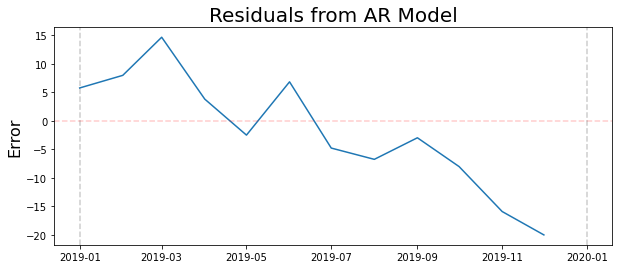

In [52]:
# plot the residuals as you can see below
# don't forget to add a horizontal line at 0 and a vertical line at the start date



Text(0, 0.5, 'production')

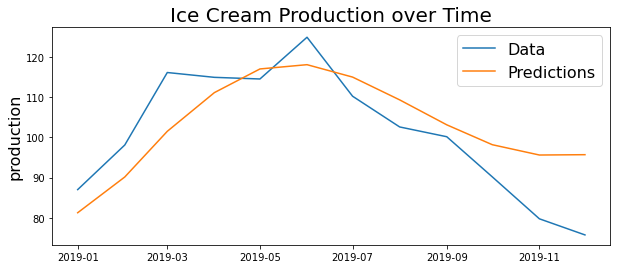

In [53]:
# compare the actual data with your predictions over time as you see below




In [55]:
# last but not least, we should look at
# 1. Mean Absolute Percentage Error
# 2. Root Mean Square Error



Mean Absolute Percentage Error: 0.0895
Root Mean Square Error: 9.8842
